In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

zip_path = '/content/drive/My Drive/meme/Models/Bert model.zip'  # Replace with your ZIP file path
extract_to = '/content/Bert model/'  # Directory where files will be extracted

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"Files extracted to {extract_to}")


Files extracted to /content/Bert model/


In [ ]:
import zipfile

zip_path = '/content/drive/My Drive/meme/Models/Qwen2.5-5B-Instruct.zip'  # Replace with your ZIP file path
extract_to = '/content/'  # Directory where files will be extracted

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"Files extracted to {extract_to}")


Files extracted to /content/


In [ ]:
import zipfile

zip_path = '/content/drive/My Drive/meme/Models/RoBERTa model.zip'  # Replace with your ZIP file path
extract_to = '/content/'  # Directory where files will be extracted

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"Files extracted to {extract_to}")


Files extracted to /content/


In [ ]:
# Model 1

from transformers import RobertaForSequenceClassification, RobertaTokenizer
model_path1 = "/content/RoBERTa model/model_card/"
model1 = RobertaForSequenceClassification.from_pretrained(model_path1)
tokenizer1 = RobertaTokenizer.from_pretrained(model_path1)



#  Model 2
from transformers import BertForSequenceClassification, BertTokenizer
model_path2 = "/content/Bert model/Bert model/model_card/"
model2 = BertForSequenceClassification.from_pretrained(model_path2)
tokenizer2 = BertTokenizer.from_pretrained(model_path2)



#  Model 3
from transformers import AutoTokenizer, AutoModelForSequenceClassification
model_path3 = "/content/Qwen2.5-5B-Instruct/model_card/"
model3 = AutoModelForSequenceClassification.from_pretrained(model_path3)
tokenizer3 = AutoTokenizer.from_pretrained(model_path3)



# Example input text
texts = ["This is an example sentence."]



# Predicting from Model 1


# Tokenize the input
inputs = tokenizer1(texts, padding=True, truncation=True, return_tensors="pt")
import torch

# Set the model to evaluation mode
model1.eval()
# Make predictions
with torch.no_grad():
    outputs = model1(**inputs)

# Extract logits
logits = outputs.logits
# Convert logits to probabilities (optional)
probs = torch.softmax(logits, dim=1)
# Get the predicted class (0 or 1)
predicted_classes = torch.argmax(logits, dim=1)
print("Predicted Classes:", predicted_classes)
print("Probabilities:", probs)




# Predicting from Model 2

encoding = tokenizer2(
    texts,
    padding='max_length',
    truncation=True,
    max_length=128,  # Use the same max_length as during training
    return_tensors="pt"
)
import torch

# Put the model in evaluation mode
model2.eval()

# Get predictions
with torch.no_grad():
    outputs = model2(**encoding)
    logits = outputs.logits
    predictions = torch.argmax(logits, dim=1)

# Convert predictions to labels
predicted_label = predictions.item()
print(f"Predicted label: {predicted_label}")





# Predicting from Model 3

encoding = tokenizer3(
    texts,
    truncation=True,
    padding='max_length',  # Match training settings
    max_length=128,        # Match training max_length
    return_tensors="pt"
)

import torch

# Put the model in evaluation mode
model3.eval()

# Make predictions
with torch.no_grad():
    outputs = model3(**encoding)
    logits = outputs.logits
    predictions = torch.argmax(logits, dim=1)

# Convert predictions to labels
predicted_label = predictions.item()
print(f"Predicted label: {predicted_label}")

In [2]:
import pandas as pd
import torch
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report
from tqdm import tqdm  # Import tqdm for progress bar

# Load the dataset
data = pd.read_csv("/content/final_datasets_new.csv")

# Combine textual features into a single input text including the sentiment_analysis column
def combine_features(row):
    return f"Text: {row['text']} | Objects: {row['detected_objects']} | Emotion: {row['Dominant Emotion']} | " \
           f"Race: {row['Dominant Race']} | Gender: {row['gender']} | Age Group: {row['age_group']} | " \
           f"Sentiment: {row['sentiment_analysis']}"

data['combined_features'] = data.apply(combine_features, axis=1)

# Split dataset into features (X) and labels (y)
X_sub = data['combined_features'].tolist()
y_sub = data['label'].tolist()  # assuming 'label' is the target column

X = X_sub[:1000]
y = y_sub[:1000]

# Define a function for making predictions
def predict_with_model(model, tokenizer, texts):
    encoding = tokenizer(texts, truncation=True, padding='max_length', max_length=128, return_tensors="pt")
    model.eval()
    with torch.no_grad():
        outputs = model(**encoding)
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=1)
    return predictions

# Load Models and Tokenizers
from transformers import RobertaForSequenceClassification, RobertaTokenizer
from transformers import BertForSequenceClassification, BertTokenizer
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_path1 = "/content/RoBERTa model/model_card/"
model1 = RobertaForSequenceClassification.from_pretrained(model_path1)
tokenizer1 = RobertaTokenizer.from_pretrained(model_path1)

model_path2 = "/content/Bert model/Bert model/model_card/"
model2 = BertForSequenceClassification.from_pretrained(model_path2)
tokenizer2 = BertTokenizer.from_pretrained(model_path2)

model_path3 = "/content/Qwen2.5-5B-Instruct/model_card/"
model3 = AutoModelForSequenceClassification.from_pretrained(model_path3)
tokenizer3 = AutoTokenizer.from_pretrained(model_path3)

# Make predictions for all models with progress bar
predictions1 = []
predictions2 = []
predictions3 = []

# Wrap prediction loops with tqdm for progress bar
for i in tqdm(range(len(X)), desc="Predicting with Model 1", position=0):
    predictions1.append(predict_with_model(model1, tokenizer1, [X[i]]))

for i in tqdm(range(len(X)), desc="Predicting with Model 2", position=1):
    predictions2.append(predict_with_model(model2, tokenizer2, [X[i]]))

for i in tqdm(range(len(X)), desc="Predicting with Model 3", position=2):
    predictions3.append(predict_with_model(model3, tokenizer3, [X[i]]))

# Convert predictions to tensor format for consistency
predictions1 = torch.cat(predictions1)
predictions2 = torch.cat(predictions2)
predictions3 = torch.cat(predictions3)

# Combine predictions using hard voting (majority voting)
import numpy as np

def hard_voting(pred1, pred2, pred3):
    return np.array([np.argmax(np.bincount([p1.item(), p2.item(), p3.item()])) for p1, p2, p3 in zip(pred1, pred2, pred3)])

# Get the final predictions
final_predictions = hard_voting(predictions1, predictions2, predictions3)

# Evaluate the model using standard metrics
accuracy = accuracy_score(y, final_predictions)
precision, recall, f1, _ = precision_recall_fscore_support(y, final_predictions, average='weighted')
precision_micro, recall_micro, f1_micro, _ = precision_recall_fscore_support(y, final_predictions, average='micro')

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Weighted): {precision:.4f}")
print(f"Recall (Weighted): {recall:.4f}")
print(f"F1 Score (Weighted): {f1:.4f}")
print(f"Precision (Micro Avg): {precision_micro:.4f}")
print(f"Recall (Micro Avg): {recall_micro:.4f}")
print(f"F1 Score (Micro Avg): {f1_micro:.4f}")

# Print classification report
print(classification_report(y, final_predictions))


Predicting with Model 1: 100%|██████████| 1000/1000 [06:15<00:00,  2.67it/s]

Predicting with Model 2: 100%|██████████| 1000/1000 [06:37<00:00,  2.51it/s]


Predicting with Model 3:   0%|          | 0/1000 [00:00<?, ?it/s]

Predicting with Model 3:   0%|          | 1/1000 [00:08<2:13:37,  8.03s/it]

Predicting with Model 3:   0%|          | 2/1000 [00:09<1:13:08,  4.40s/it]

Predicting with Model 3:   0%|          | 3/1000 [00:11<53:59,  3.25s/it]  

Predicting with Model 3:   0%|          | 4/1000 [00:13<44:12,  2.66s/it]

Predicting with Model 3:   0%|          | 5/1000 [00:14<36:26,  2.20s/it]

Predicting with Model 3:   1%|          | 6/1000 [00:16<31:41,  1.91s/it]

Predicting with Model 3:   1%|          | 7/1000 [00:17<28:53,  1.75s/it]

Predicting with Model 3:   1%|          | 8/1000 [00:19<26:50,  1.62s/it]

Predicting with Model 3:   1%|          | 9/1000 [00:20<25:22,  1.54s/it]

Predicting with Model 3:   1%|          | 10/1000 [00:21<24:35,  1.49s/it]

Predicting with Mod

Accuracy: 0.7860
Precision (Weighted): 0.7830
Recall (Weighted): 0.7860
F1 Score (Weighted): 0.7840
Precision (Micro Avg): 0.7860
Recall (Micro Avg): 0.7860
F1 Score (Micro Avg): 0.7860
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       658
           1       0.70      0.65      0.68       342

    accuracy                           0.79      1000
   macro avg       0.76      0.75      0.76      1000
weighted avg       0.78      0.79      0.78      1000



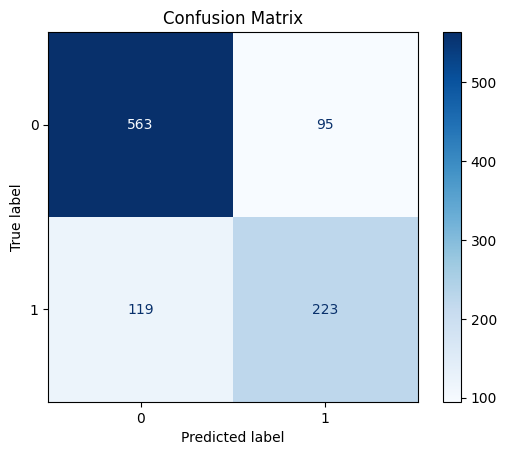

In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, RocCurveDisplay

# Draw the confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues", values_format="d")
    plt.title("Confusion Matrix")
    plt.show()

plot_confusion_matrix(y, final_predictions)

In [15]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report

# Assuming the predictions from the three models are available:
# BERT, Qwen, and RoBERTa = [0.90, 0.80, 1.00]

# Define model weights based on accuracy
weights = np.array([1.0, 0.90, 0.80])  # Weights based on accuracy of each model

# Function to calculate weighted voting
def weighted_voting(pred1, pred2, pred3, weights):
    final_pred = []
    for p1, p2, p3 in zip(pred1, pred2, pred3):
        weighted_votes = np.array([p1.item(), p2.item(), p3.item()])
        final_vote = np.argmax(np.bincount(weighted_votes, weights=weights))
        final_pred.append(final_vote)
    return np.array(final_pred)

# Apply weighted voting ensemble
final_predictions = weighted_voting(predictions1, predictions2, predictions3, weights)

# Evaluate the model using standard metrics
accuracy = accuracy_score(y, final_predictions)
precision, recall, f1, _ = precision_recall_fscore_support(y, final_predictions, average='weighted')
precision_micro, recall_micro, f1_micro, _ = precision_recall_fscore_support(y, final_predictions, average='micro')

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Weighted): {precision:.4f}")
print(f"Recall (Weighted): {recall:.4f}")
print(f"F1 Score (Weighted): {f1:.4f}")
print(f"Precision (Micro Avg): {precision_micro:.4f}")
print(f"Recall (Micro Avg): {recall_micro:.4f}")
print(f"F1 Score (Micro Avg): {f1_micro:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y, final_predictions))


Accuracy: 0.7860
Precision (Weighted): 0.7830
Recall (Weighted): 0.7860
F1 Score (Weighted): 0.7840
Precision (Micro Avg): 0.7860
Recall (Micro Avg): 0.7860
F1 Score (Micro Avg): 0.7860

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       658
           1       0.70      0.65      0.68       342

    accuracy                           0.79      1000
   macro avg       0.76      0.75      0.76      1000
weighted avg       0.78      0.79      0.78      1000



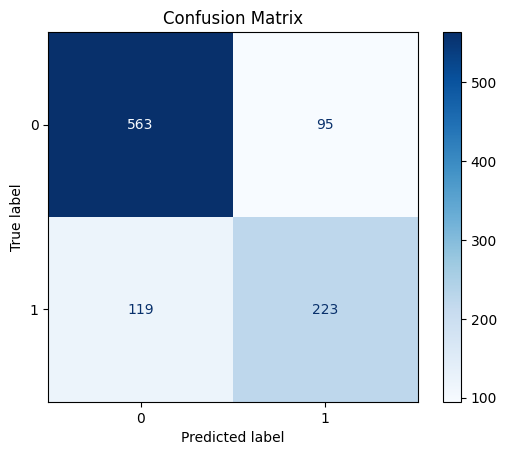

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, RocCurveDisplay

# Draw the confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues", values_format="d")
    plt.title("Confusion Matrix")
    plt.show()

plot_confusion_matrix(y, final_predictions)
